<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/Final_Project/PUS_Final_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 12.5MB/s 
     |████████████████████████████████| 6.5MB 23.3MB/s 
     |████████████████████████████████| 14.8MB 297kB/s 


In [ ]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/NDVI_US_Urban_PUS.csv')
dat = dat[['GEOID', 'MATCH', 'a_pop', 'age', 'b_pop', 'income', 'mean', 'pdensity', 'w_pop', 'pop']]

In [ ]:
health = pd.read_csv('/content/drive/MyDrive/Health_Data_PUS.csv')


In [ ]:
def gettract(cname):
  return cname.split('-')[-1]
health["GEOID"] = health.Place_TractID.astype(str).map(gettract)
health['GEOID1'] = health['GEOID'].astype(int)

In [ ]:
dat = dat.merge(health, left_on = 'GEOID', right_on = 'GEOID1')
dat

,GEOID_x,MATCH,a_pop,age,b_pop,income,mean,pdensity,w_pop,pop,ID,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke,GEOID_y,GEOID1
0,36001002500,36Census Tract 251,0,27.1,2441,18971,0.142750,2013.744359,365,3413,16257,NY,Albany,3601000,36001002500,3601000-36001002500,26.3,13.4,38.8,4.2,13.8,7.2,10.0,16.6,48.1,5.2,36001002500,36001002500
1,36001001400,36Census Tract 141,365,30.8,771,44790,0.267874,2369.159006,2693,3990,16245,NY,Albany,3601000,36001001400,3601000-36001001400,16.0,23.7,20.4,4.2,9.3,3.5,3.9,6.0,34.8,1.7,36001001400,36001001400
2,35001004739,35Census Tract 47.391,159,28.3,87,41859,0.115338,1810.426056,5112,7013,16148,NM,Albuquerque,3502000,35001004739,3502000-35001004739,18.9,16.0,23.5,3.5,10.7,4.1,5.0,9.3,36.8,2.4,35001004739,35001004739
3,35001004748,35Census Tract 47.481,140,32.9,133,78965,0.133019,1614.310243,9237,10784,16157,NM,Albuquerque,3502000,35001004748,3502000-35001004748,18.4,19.3,20.1,4.6,9.6,3.1,3.6,5.7,32.1,1.7,35001004748,35001004748
4,8001007900,8Census Tract 791,119,30.2,834,41738,0.170150,1929.676683,2832,5684,6792,CO,Aurora,804000,8001007900,0804000-08001007900,18.3,17.0,25.0,3.7,10.5,4.4,5.3,9.8,36.4,2.8,08001007900,8001007900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,24510190300,24Census Tract 1903510,102,29.1,1482,23750,0.156066,2691.072805,613,2502,12937,MD,Baltimore,2404000,24510190300,2404000-24510190300,28.0,14.8,41.6,5.3,12.5,8.0,11.0,16.0,46.5,5.6,24510190300,24510190300
8250,24510270805,24Census Tract 2708.05510,78,38.5,4425,54139,0.258517,1725.035204,565,5312,13007,MD,Baltimore,2404000,24510270805,2404000-24510270805,25.7,16.2,39.1,5.8,11.3,5.0,6.0,12.8,43.8,3.8,24510270805,24510270805
8251,24510270901,24Census Tract 2709.01510,0,34.4,4090,52803,0.239798,2600.647511,121,4348,13008,MD,Baltimore,2404000,24510270901,2404000-24510270901,26.3,15.8,40.8,5.9,11.9,5.4,6.3,13.7,45.5,4.2,24510270901,24510270901
8252,24510270902,24Census Tract 2709.02510,37,26.7,4790,57356,0.252511,1918.196244,264,5363,13009,MD,Baltimore,2404000,24510270902,2404000-24510270902,22.5,17.6,35.0,5.2,11.7,4.4,5.1,11.2,42.9,3.4,24510270902,24510270902


In [ ]:
latlong = pd.read_csv('/content/drive/MyDrive/urban_centers_latlong.csv')
latlong

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1,county1,MATCH
0,0,5,119,3304,5119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,34.787523,-92.245855,POINT (-92.2454501360844 34.78769571930854),5,119,5Census Tract 33.04119
1,1,5,119,3500,5119003500,35.00,Census Tract 35,G5020,S,25337534,157182,34.905743,-92.138294,POINT (-92.13851193747659 34.9038245596053),5,119,5Census Tract 35119
2,2,5,119,3607,5119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,34.856007,-92.086512,POINT (-92.08886129099896 34.85630675160955),5,119,5Census Tract 36.07119
3,3,5,119,3608,5119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,34.874162,-92.104379,POINT (-92.10437891580091 34.87416161457914),5,119,5Census Tract 36.08119
4,4,5,119,4007,5119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,34.674419,-92.215355,POINT (-92.20715834278229 34.66703127520943),5,119,5Census Tract 40.07119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72533,1404,55,43,960800,55043960800,9608.00,Census Tract 9608,G5020,S,253210348,15987542,42.711744,-90.623273,POINT (-90.63351739540906 42.70854794419667),55,43,55Census Tract 960843
72534,1405,55,43,960100,55043960100,9601.00,Census Tract 9601,G5020,S,364751519,3687082,43.085130,-90.533869,POINT (-90.5168833709334 43.07774517288923),55,43,55Census Tract 960143
72535,1406,55,43,960500,55043960500,9605.00,Census Tract 9605,G5020,S,569068167,31186956,42.806624,-90.867735,POINT (-90.86807605107958 42.80680262351153),55,43,55Census Tract 960543
72536,1407,55,43,961100,55043961100,9611.00,Census Tract 9611,G5020,S,188421248,10418252,42.622424,-90.553401,POINT (-90.55929860047544 42.63139289141136),55,43,55Census Tract 961143


In [ ]:
def gettract(cname):
  return cname.split('(')[-1]
latlong["tot"] = latlong.geometry.astype(str).map(gettract)

def gettract(cname):
  return cname.split(')')[0]
latlong["tot"] = latlong.tot.astype(str).map(gettract)

def gettract(cname):
  return cname.split(' ')[-1]
latlong["lat"] = latlong.tot.astype(str).map(gettract)

def gettract(cname):
  return cname.split(' ')[0]
latlong["long"] = latlong.tot.astype(str).map(gettract)


latlong['long'] = latlong['long'].astype(float)
latlong['lat'] = latlong['lat'].astype(float)
latlong = latlong[['GEOID', 'lat', 'long']]


In [ ]:
latlong

,GEOID,lat,long
0,5119003304,34.787696,-92.245450
1,5119003500,34.903825,-92.138512
2,5119003607,34.856307,-92.088861
3,5119003608,34.874162,-92.104379
4,5119004007,34.667031,-92.207158
...,...,...,...
72533,55043960800,42.708548,-90.633517
72534,55043960100,43.077745,-90.516883
72535,55043960500,42.806803,-90.868076
72536,55043961100,42.631393,-90.559299


In [ ]:
dat = dat.merge(latlong, left_on = 'GEOID_x', right_on = 'GEOID')
dat

,GEOID_x,MATCH,a_pop,age,b_pop,income,mean,pdensity,w_pop,pop,ID,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke,GEOID_y,GEOID1,GEOID,lat,long
0,36001002500,36Census Tract 251,0,27.1,2441,18971,0.142750,2013.744359,365,3413,16257,NY,Albany,3601000,36001002500,3601000-36001002500,26.3,13.4,38.8,4.2,13.8,7.2,10.0,16.6,48.1,5.2,36001002500,36001002500,36001002500,42.641156,-73.755016
1,36001001400,36Census Tract 141,365,30.8,771,44790,0.267874,2369.159006,2693,3990,16245,NY,Albany,3601000,36001001400,3601000-36001001400,16.0,23.7,20.4,4.2,9.3,3.5,3.9,6.0,34.8,1.7,36001001400,36001001400,36001001400,42.656574,-73.768560
2,35001004739,35Census Tract 47.391,159,28.3,87,41859,0.115338,1810.426056,5112,7013,16148,NM,Albuquerque,3502000,35001004739,3502000-35001004739,18.9,16.0,23.5,3.5,10.7,4.1,5.0,9.3,36.8,2.4,35001004739,35001004739,35001004739,35.065418,-106.736079
3,35001004748,35Census Tract 47.481,140,32.9,133,78965,0.133019,1614.310243,9237,10784,16157,NM,Albuquerque,3502000,35001004748,3502000-35001004748,18.4,19.3,20.1,4.6,9.6,3.1,3.6,5.7,32.1,1.7,35001004748,35001004748,35001004748,35.198000,-106.737633
4,8001007900,8Census Tract 791,119,30.2,834,41738,0.170150,1929.676683,2832,5684,6792,CO,Aurora,804000,8001007900,0804000-08001007900,18.3,17.0,25.0,3.7,10.5,4.4,5.3,9.8,36.4,2.8,08001007900,8001007900,8001007900,39.748893,-104.873808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,24510190300,24Census Tract 1903510,102,29.1,1482,23750,0.156066,2691.072805,613,2502,12937,MD,Baltimore,2404000,24510190300,2404000-24510190300,28.0,14.8,41.6,5.3,12.5,8.0,11.0,16.0,46.5,5.6,24510190300,24510190300,24510190300,39.283973,-76.644425
8250,24510270805,24Census Tract 2708.05510,78,38.5,4425,54139,0.258517,1725.035204,565,5312,13007,MD,Baltimore,2404000,24510270805,2404000-24510270805,25.7,16.2,39.1,5.8,11.3,5.0,6.0,12.8,43.8,3.8,24510270805,24510270805,24510270805,39.359624,-76.603351
8251,24510270901,24Census Tract 2709.01510,0,34.4,4090,52803,0.239798,2600.647511,121,4348,13008,MD,Baltimore,2404000,24510270901,2404000-24510270901,26.3,15.8,40.8,5.9,11.9,5.4,6.3,13.7,45.5,4.2,24510270901,24510270901,24510270901,39.349970,-76.594983
8252,24510270902,24Census Tract 2709.02510,37,26.7,4790,57356,0.252511,1918.196244,264,5363,13009,MD,Baltimore,2404000,24510270902,2404000-24510270902,22.5,17.6,35.0,5.2,11.7,4.4,5.1,11.2,42.9,3.4,24510270902,24510270902,24510270902,39.350952,-76.584319


In [ ]:
dat['b_dens'] = dat['b_pop'] / dat['pop']
dat['a_dens'] = dat['a_pop'] / dat['pop']
dat['w_dens'] = dat['w_pop'] / dat['pop']
dat['ndvi'] = dat['mean']
dat.head()

,GEOID_x,MATCH,a_pop,age,b_pop,income,mean,pdensity,w_pop,pop,ID,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke,GEOID_y,GEOID1,GEOID,lat,long,b_dens,a_dens,w_dens,ndvi
0,36001002500,36Census Tract 251,0,27.1,2441,18971,0.142750,2013.744359,365,3413,16257,NY,Albany,3601000,36001002500,3601000-36001002500,26.3,13.4,38.8,4.2,13.8,7.2,10.0,16.6,48.1,5.2,36001002500,36001002500,36001002500,42.641156,-73.755016,0.715207,0.000000,0.106944,0.142750
1,36001001400,36Census Tract 141,365,30.8,771,44790,0.267874,2369.159006,2693,3990,16245,NY,Albany,3601000,36001001400,3601000-36001001400,16.0,23.7,20.4,4.2,9.3,3.5,3.9,6.0,34.8,1.7,36001001400,36001001400,36001001400,42.656574,-73.768560,0.193233,0.091479,0.674937,0.267874
2,35001004739,35Census Tract 47.391,159,28.3,87,41859,0.115338,1810.426056,5112,7013,16148,NM,Albuquerque,3502000,35001004739,3502000-35001004739,18.9,16.0,23.5,3.5,10.7,4.1,5.0,9.3,36.8,2.4,35001004739,35001004739,35001004739,35.065418,-106.736079,0.012406,0.022672,0.728932,0.115338
3,35001004748,35Census Tract 47.481,140,32.9,133,78965,0.133019,1614.310243,9237,10784,16157,NM,Albuquerque,3502000,35001004748,3502000-35001004748,18.4,19.3,20.1,4.6,9.6,3.1,3.6,5.7,32.1,1.7,35001004748,35001004748,35001004748,35.198000,-106.737633,0.012333,0.012982,0.856547,0.133019
4,8001007900,8Census Tract 791,119,30.2,834,41738,0.170150,1929.676683,2832,5684,6792,CO,Aurora,804000,8001007900,0804000-08001007900,18.3,17.0,25.0,3.7,10.5,4.4,5.3,9.8,36.4,2.8,08001007900,8001007900,8001007900,39.748893,-104.873808,0.146728,0.020936,0.498241,0.170150


In [ ]:
dat1 = dat[['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat', 'long', 'ndvi']]
dat1.head()

,age,income,pdensity,b_dens,a_dens,w_dens,lat,long,ndvi
0,27.1,18971,2013.744359,0.715207,0.000000,0.106944,42.641156,-73.755016,0.142750
1,30.8,44790,2369.159006,0.193233,0.091479,0.674937,42.656574,-73.768560,0.267874
2,28.3,41859,1810.426056,0.012406,0.022672,0.728932,35.065418,-106.736079,0.115338
3,32.9,78965,1614.310243,0.012333,0.012982,0.856547,35.198000,-106.737633,0.133019
4,30.2,41738,1929.676683,0.146728,0.020936,0.498241,39.748893,-104.873808,0.170150


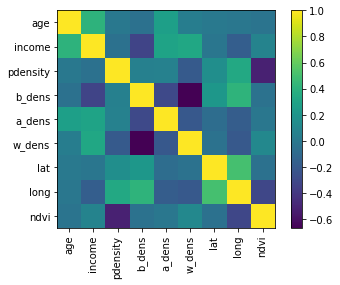

In [ ]:
plt.imshow(dat1.corr())
plt.xticks(range(len(dat1.corr())), dat1.corr().columns, rotation='vertical')
plt.yticks(range(len(dat1.corr())), dat1.corr().columns)
plt.colorbar();

In [ ]:
from sklearn.model_selection import train_test_split

x = dat[['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat', 'long']]
y = dat[['ndvi']]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rf.score(X_train, y_train)

0.37503804741584457

In [ ]:
rf.score(X_test, y_test)

0.32367115405357505

In [ ]:
names = list(dat1.columns.values.tolist())

feature_names = np.array(names)

feature_names


array(['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat',
       'long', 'ndvi'], dtype='<U8')

Text(0.5, 0, 'Random Forest Feature Importance')

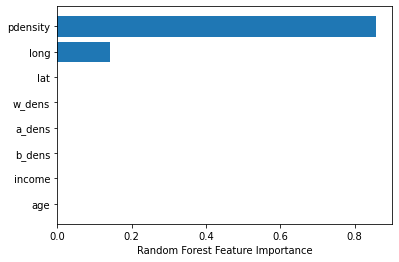

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

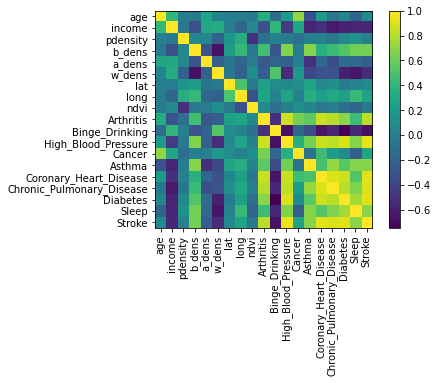

In [ ]:
dat2 = dat[['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat', 'long', 'ndvi','Arthritis', 'Binge_Drinking', 'High_Blood_Pressure', 'Cancer', 'Asthma', 'Coronary_Heart_Disease', 'Chronic_Pulmonary_Disease', 'Diabetes', 'Sleep', 'Stroke']]
plt.imshow(dat2.corr())
plt.xticks(range(len(dat2.corr())), dat2.corr().columns, rotation='vertical')
plt.yticks(range(len(dat2.corr())), dat2.corr().columns)
plt.colorbar();

In [ ]:
# [['Arthritis', 'Binge_Drinking', 'High_Blood_Pressure', 'Cancer', 'Asthma', 'Coronary_Heart_Disease', 'Chronic_Pulmonary_Disease', 'Diabetes', 'Sleep', 'Stroke']]
from sklearn.model_selection import train_test_split

x = dat[['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat', 'long', 'ndvi']]
y = dat[['Stroke']]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rf.score(X_train, y_train)

0.5087800696878113

In [ ]:
rf.score(X_test, y_test)

0.4978483692295789

In [ ]:
names = list(x.columns.values.tolist())


feature_names = np.array(names)

feature_names

array(['age', 'income', 'pdensity', 'b_dens', 'a_dens', 'w_dens', 'lat',
       'long', 'ndvi'], dtype='<U8')

Text(0.5, 0, 'Random Forest Feature Importance')

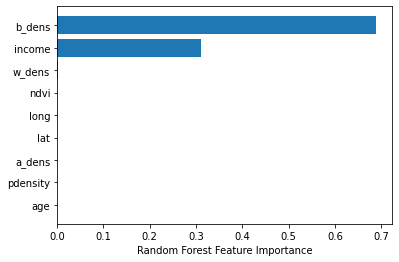

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")